# TP: Machine Learning (SIA_3611)

## TP2: Classification (4h) 

In machine learning, classification is related to supervised learning approaches in which the algorithm fits from an annotated set of data. This learning phase is followed by a validation phase to evaluate the classification model through several metrics. Once the model is correctly validated, a generalization phase is used to classify new data.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP2 is to visualize feature space and try to predict the development of countries.

**Objectives:**
- Visualize the feature space
- Discuss the feasibility of feature space separation
- Normalize the datasets
- Train a K-NN, a decision tree, a random forest and a SVM
- Visualize the decision boundary for each method
- Create a test dataset
- Compute AUC scores on a evaluation dataset
- Tune hyperparameters
- Visualize the modification of decision boundary for each tuning
- Discuss the limits of the four implementations


## STEP 1: Feature space visualization

You will work on the WHO dataset in the year 2000. This first step consists of choosing two features to perform a classification.

**TO DO 1.1**

If you are using jupyter-notebook, execute the following cell :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

df = pd.read_csv("data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_mortality                  1649 non-null   float64
 5   Infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five_deaths                1649 non-null   int64  
 12  Polio               

<module 'matplotlib.pyplot' from '/home/guillaume/Documents/Cours/ENSEA/3eme_annee/ML/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

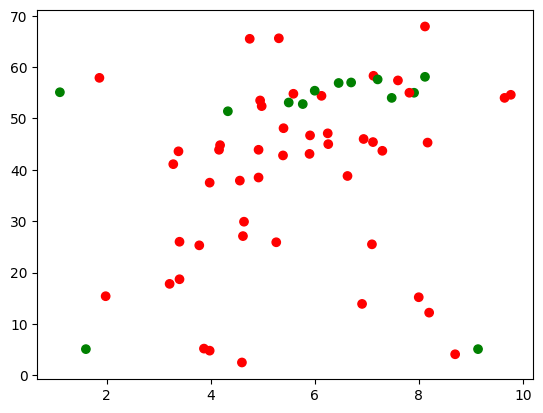

In [2]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

**QUESTION 1**

Why was the label status binarized?

Is this feature space easily separable? Justify your response

**TO CODE 1.2**

Plot Total expenditure against Schooling

**TO CODE 1.3**

Plot Life Expectancy against Schooling

**QUESTION 2**

What would be the best features to use? Justify your response

Use those features as df_X.

## STEP 2: Dataset normalization

To classify, the values in the learning dataset must be normalized (aka between 0 and 1). This normalization can be performed through various ways.

**TO CODE 2.1**

Normalize df_X. This normalization should perfectly frame the data (aka the minimum and the maximum values of each feature should be respectively 0 and 1).

**TO DO 2.2**

Each following cell performs a learning step and an AUC scores computation. For each classifier, several parameters have been chosen.

In [3]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf1, np_X_norm, np_Y)
plt.show()

NameError: name 'np_X_norm' is not defined

In [4]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear', probability=True)
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf2, np_X_norm, np_Y)
plt.show()

NameError: name 'np_X_norm' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf3, np_X_norm, np_Y)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf4, np_X_norm, np_Y)
plt.show()

**QUESTION 3**

Identify each used classifiers and specify the used parameters

Describe and explain the results obtained for each ROC curve. What is the relation between the AUC and the ROC curve ? According to the ROC curve, which model is the best if we want to maximize the sensitivity ? And if we want to maximize the specificity ? Compare those results with the AUC. 

For a two-classes problem, a decision boundary is a hypersurface which splits the feature space between two sets (for each class). Then this surface is composed of all the equiprobability points in the feature space.

**TO DO 2.3**

Plot the decision boundary with df_X for each classifiers

In [ ]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 4**

What is the main problem of the classification step with this dataset?

In your opinion, which classifier is better suited for this classification task? Justify your response

## STEP 3: Biases correction and model tuning

In this part, you will focus on improving the AUC scores of the four methods.

Firstable, you will weigh the classes to balance the classifier response. Then you will tune various hyperparameters.

**TO CODE 3.1**

Compute the percentage of "Developed" class in df_Y.

SVM, Decision Tree and Random Forest algorithms have a parameter named:

```
class_weight
```
Here is a extract from sklearn documentation:

**class_weight** dict, list of dict or “balanced”, default=None

Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.


**QUESTION 5**

What would be the weight values for each class?

**TO CODE 3.2**

Balance SVM, Decision Tree and Random Forest classifiers and plot the decision boundaries

**TO CODE 3.3**

Compute the new AUC scores

**QUESTION 6**

Why did the AUC scores increase? How do you interpret it?

In your opinion, has the classe balance improved the classification?


Let's focus on the SVM classifier.

Sklearn allows multiple kernels.

Here is an extract of the documentation:

**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).


**TO CODE 3.4**

Test the gaussian and the polynomial kernels with balanced classes and plot the decision boundaries

**QUESTION 7**

In your opinion, which is the best kernel for this dataset? Justify your response

**BONUS**

Tune the parameters for Decision Tree and Random Forest algorithms and plot the decision boundaries

## STEP 4: An evaluation dataset

This part is to test the generalization of your models.

You trained several classifiers on two features extracted from the year 2000.

**TO CODE 4.1**

Apply your models on the year 2012

**QUESTION 8**

Are your models still relevant in the year 2012?